In [2]:

import  numpy  as  np
import matplotlib.pyplot  as plt
from os import listdir,walk
from os.path import isfile, join
from scipy.misc import imread
import math
import PIL
from keras.layers import Reshape,Dense
import numpy as np
from keras.layers import UpSampling2D,MaxPool2D,Conv2D,Activation,Dropout,BatchNormalization,Conv2DTranspose
from keras.models import Sequential,load_model
import matplotlib.pyplot as plt
from scipy.misc import imresize
from scipy import ndimage as nd

from skimage.measure import compare_psnr, compare_ssim
from tqdm import tqdm_notebook as tqdm
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import ycbcr2rgb, rgb2ycbcr
from scipy.misc import imread
from os import listdir
import cv2
import imageio

In [9]:
path ='./Train/HR_CE/'
impath = []
for files in sorted(listdir(path)):
    images = join(path,files) #join path and images name
    impath.append(images)
    

 

In [13]:
list_images= impath
imgs = [PIL.Image.open(i) for i in list_images] #open all the images
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
print(min_shape)

(320, 480)


In [127]:
min_shape = 120, 80

In [137]:
resize_imgs = list(np.asarray(i.resize(min_shape)) for i in imgs)
#resize_imgs = list(np.asarray(i) for i in new_img)

In [131]:
np.shape(resize_imgs)

(100, 80, 120, 3)

In [157]:
import scipy.ndimage
imgs_comb = PIL.Image.fromarray( resize_imgs[6])
t=scipy.ndimage.zoom(imgs_comb,1,order=3)
t.shape

(80, 120, 3)

In [158]:
imf = imgs_comb.save( '111.png' )

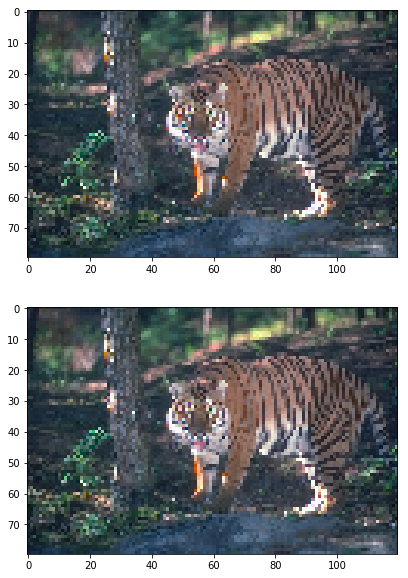

In [160]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.imshow(t)
plt.subplot(212)
plt.imshow((imgs_comb))
plt.show()

In [151]:
import numpy as np
import scipy.ndimage

x = np.arange(9).reshape(3,3)

print('Original array:')
print(x)

print('Resampled by a factor of 2 with bilinear interpolation:')
print(scipy.ndimage.zoom(x, 1, order=1))


print('Resampled by a factor of 2 with cubic interpolation:')
print(scipy.ndimage.zoom(x, 2, order=3))

Original array:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Resampled by a factor of 2 with bilinear interpolation:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Resampled by a factor of 2 with cubic interpolation:
[[0 0 1 1 2 2]
 [1 1 1 2 2 3]
 [2 2 3 3 4 4]
 [4 4 5 5 6 6]
 [5 6 6 7 7 7]
 [6 6 7 7 8 8]]
